# Example 3: Density fields
Density field examples for:
    
1. Uniform stretching
2. Spherical expansion
3. Stratified deformation
4. Diagonal twist

These are extreme density fields designed to demonstrate different ways the density functions can be applied, and show that the alogorithm is stable even when the functional region occupies the full grid. For more computationally efficient and predictable deformations, the functional region should be embedded in a uniform sea (see example 2, section 1, free boudary conditions)

In [34]:
import pyVDERM as vd
import numpy as np

## Uniform stretching
Create a linearly increasing density field from left to right, to stretch an object

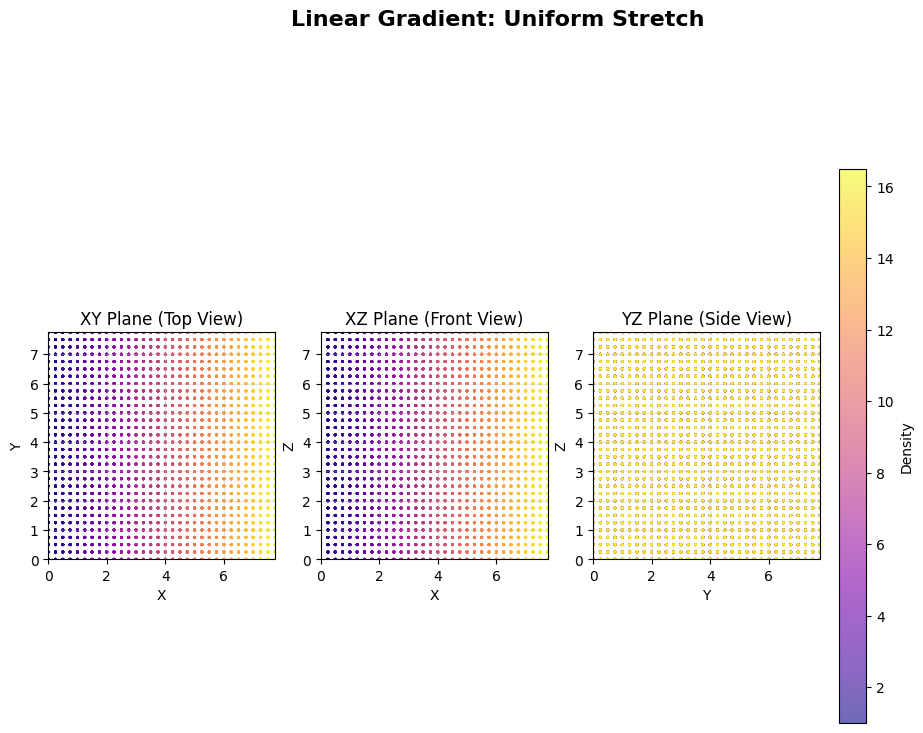

Deforming: 100%|██████████| 1000/1000 [04:10<00:00,  3.99it/s, ε=3.232e-02, target=2.000e-02]


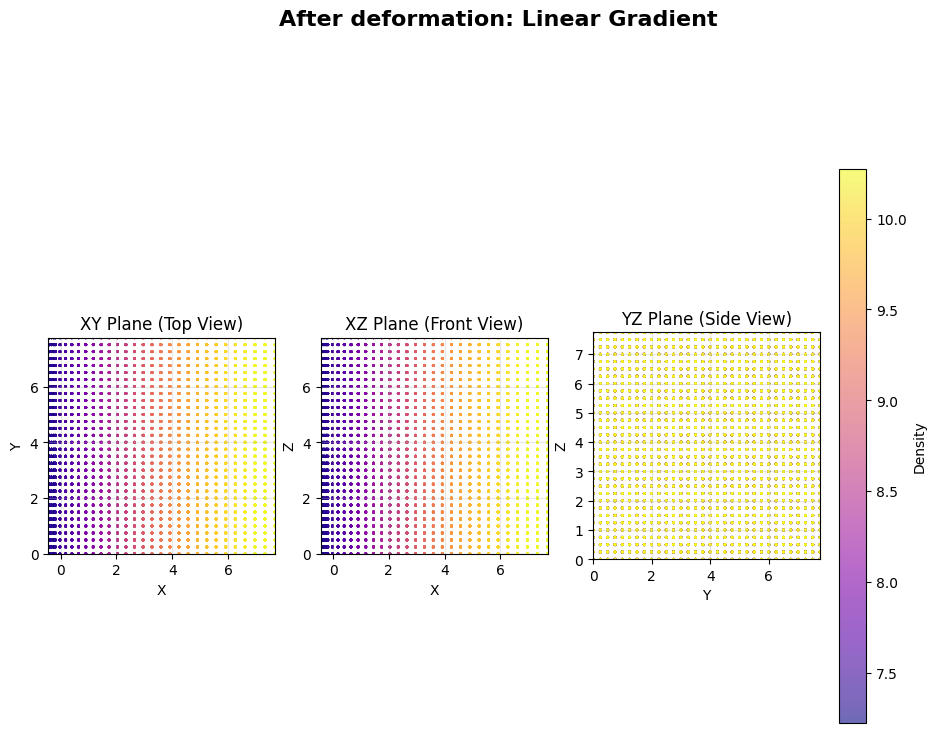

In [35]:
def linear_gradient_density(x, y, z):
    """
    Linear density gradient - creates uniform stretching.
    
    Higher density on one side causes that side to expand uniformly.
    Good for demonstrating basic density → volume relationship.
    """
    return 1.0 + 2.0 * x  # Density increases left to right

# Setup and visualize
grid_gradient = vd.VDERMGrid(shape=(32, 32, 32), h=0.25, min_bounds=[0, 0, 0])
grid_gradient.set_density(linear_gradient_density)

vd.plot_pcd(grid_gradient.positions, densities=grid_gradient.rho.ravel(),
              title='Linear Gradient: Uniform Stretch', view='2d')

# Run VDERM
final_gradient = vd.run_VDERM(grid_gradient, n_max=1000)
fig = vd.plot_pcd(final_gradient.positions, densities=final_gradient.rho.ravel(),
              title='After deformation: Linear Gradient', view='2d')

## Spherical expansion
Create a high density spherical shell in the center of the grid, resulting in an inflation like deformation

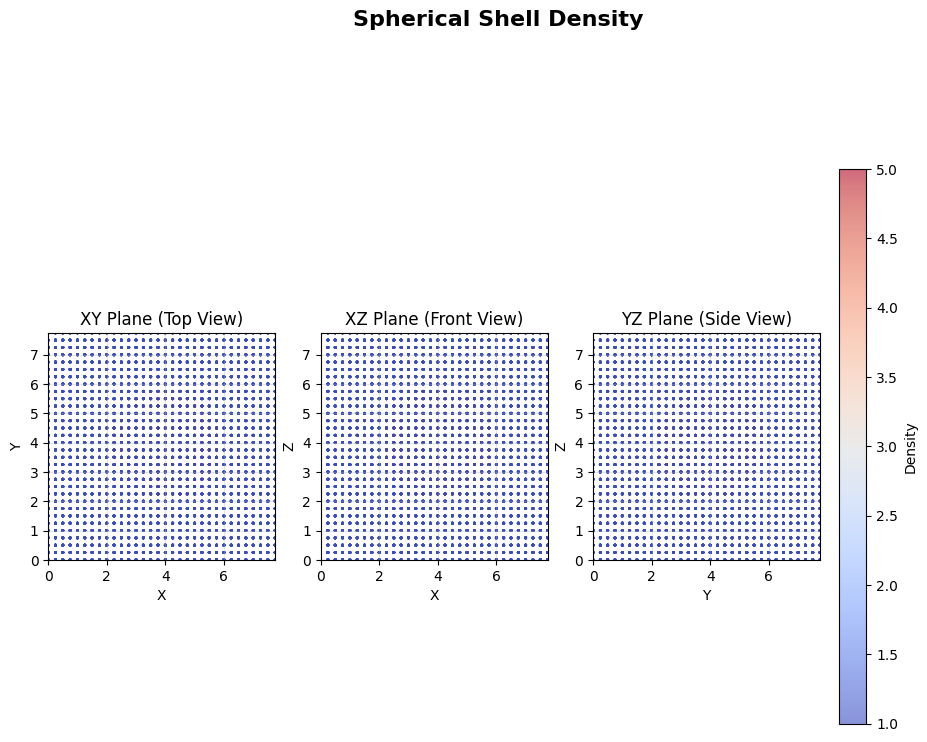

Converged:  71%|███████   | 709/1000 [02:43<01:07,  4.33it/s, ε=9.985e-03, target=1.000e-02]



Converged at iteration 709


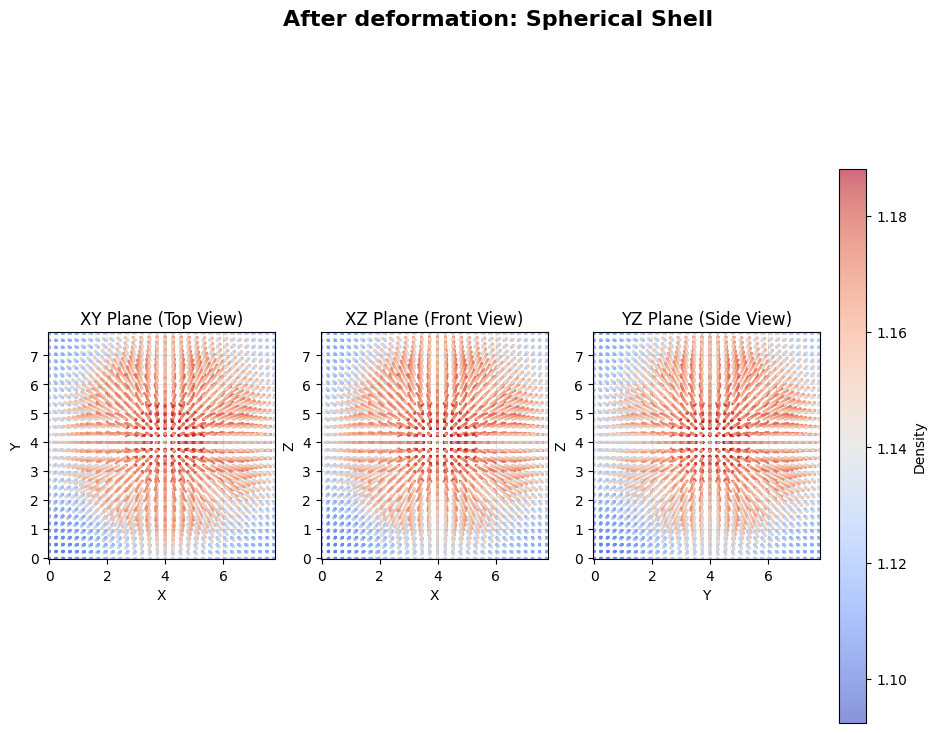

In [36]:
def spherical_shell_density(x, y, z):
    """
    High density in a spherical shell - creates hollow expansion.
    
    Demonstrates how VDERM handles radially symmetric density distributions.
    Creates interesting "inflating balloon" effect.
    """
    center = np.array([4, 4, 4])
    point = np.array([x, y, z])
    r = np.linalg.norm(point - center)
    
    # High density in shell between r=0.5 and r=0.7
    shell_inner = 1.5
    shell_outer = 2
    
    if shell_inner < r < shell_outer:
        return 5.0  # High density in shell
    else:
        return 1.0  # Low density elsewhere

# Setup
grid_sphere = vd.VDERMGrid(shape=(32, 32, 32), h=0.25, min_bounds=[0, 0, 0])
grid_sphere.set_density(spherical_shell_density)

vd.plot_pcd(grid_sphere.positions, densities=grid_sphere.rho.ravel(),
              title='Spherical Shell Density', view='2d', cmap='coolwarm')

final_sphere = vd.run_VDERM(grid_sphere, n_max=1000, max_eps=0.01)
fig = vd.plot_pcd(final_sphere.positions, densities=final_sphere.rho.ravel(),
              title='After deformation: Spherical Shell', view='2d', cmap='coolwarm')

# Density bands
Create stratified regions of density, alternating high-low

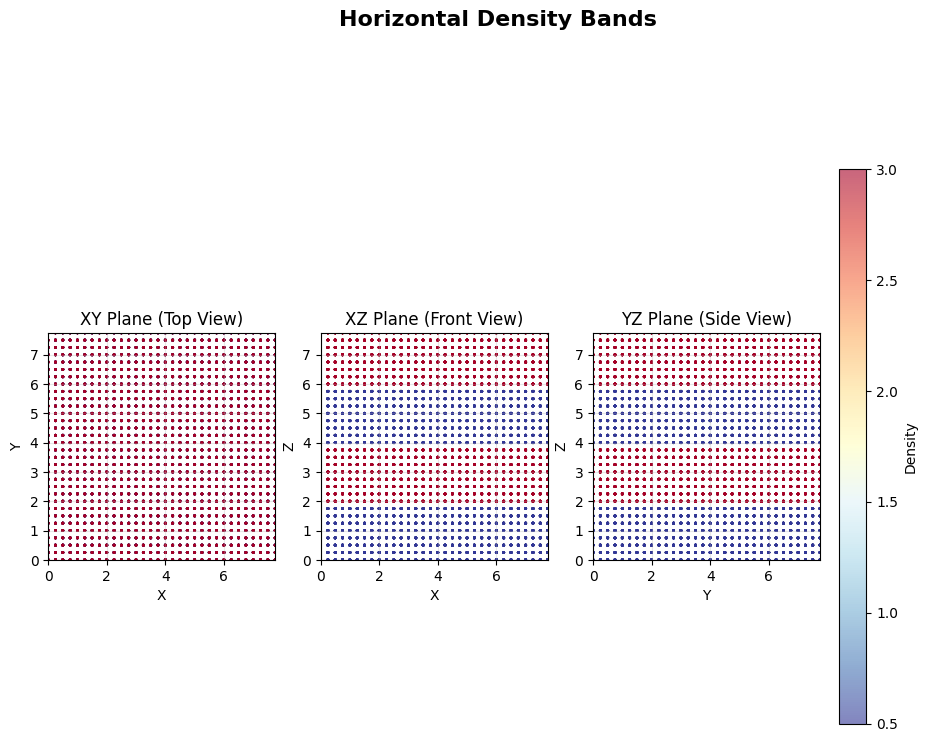

Deforming: 100%|██████████| 1000/1000 [03:46<00:00,  4.41it/s, ε=1.644e-02, target=1.000e-02]


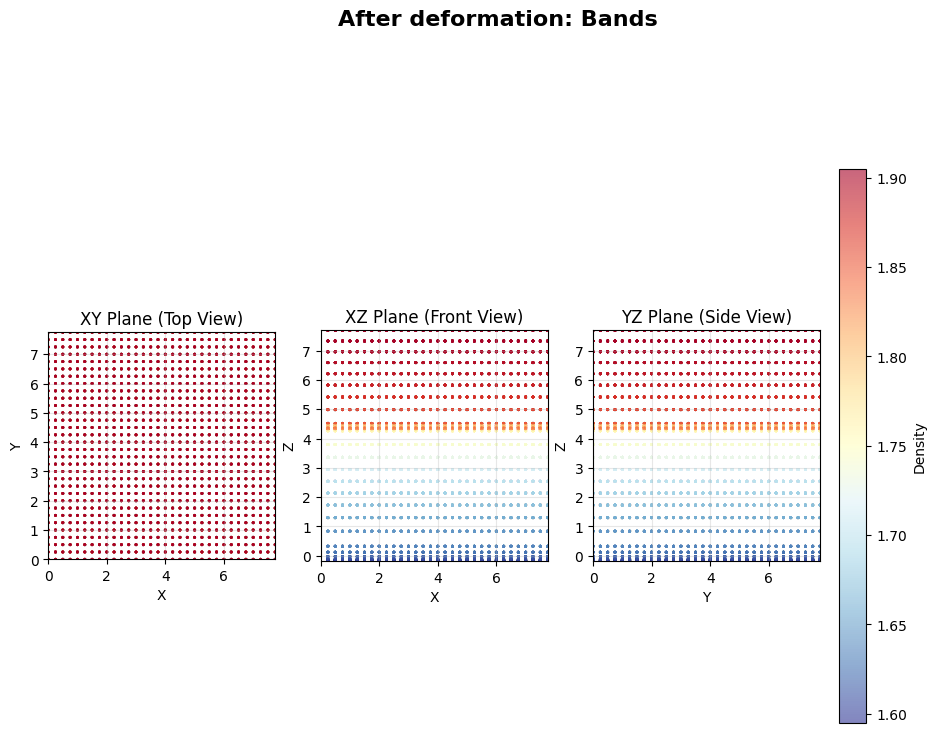

In [37]:
# Create horizontal density bands
L, M, N = 32, 32, 32
rho_bands = np.ones((L, M, N))

# Create 4 horizontal layers with alternating densities
# Bottom to top: low, high, low, high
for k in range(N):
    if k < 8:
        rho_bands[:, :, k] = 0.5   # Bottom layer: low density (compressed)
    elif k < 16:
        rho_bands[:, :, k] = 3.0   # Layer 2: high density (expanded)
    elif k < 24:
        rho_bands[:, :, k] = 0.5   # Layer 3: low density
    else:
        rho_bands[:, :, k] = 3.0   # Top layer: high density

# Setup
grid_bands = vd.VDERMGrid(shape=(L, M, N), h=0.25, min_bounds=[0, 0, 0])
grid_bands.set_density(rho_bands)

vd.plot_pcd(grid_bands.positions, densities=rho_bands.ravel(),
              title='Horizontal Density Bands', view='2d', cmap='RdYlBu_r')

final_bands = vd.run_VDERM(grid_bands, n_max=1000, max_eps=0.01)
fig = vd.plot_pcd(final_bands.positions, densities=final_bands.rho.ravel(),
              title='After deformation: Bands', view='2d', cmap='RdYlBu_r')

## Diagonal twist
Create a twisting diagonal deformation along the 0,0,0 -> 1,1,1 line

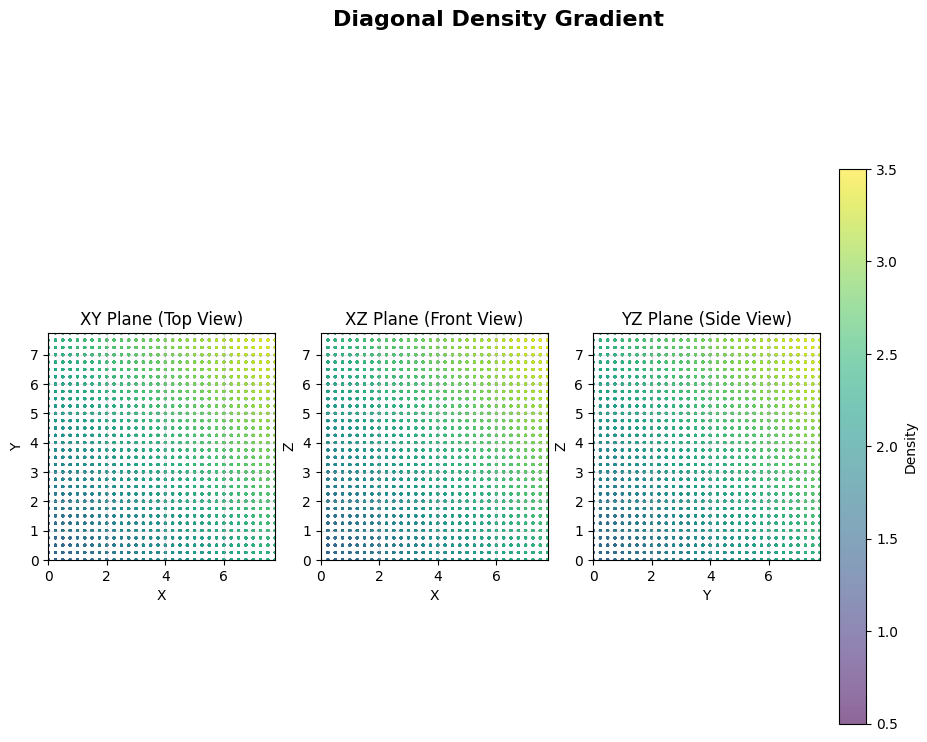

Deforming: 100%|██████████| 1000/1000 [04:25<00:00,  3.76it/s, ε=1.580e-02, target=1.000e-02]


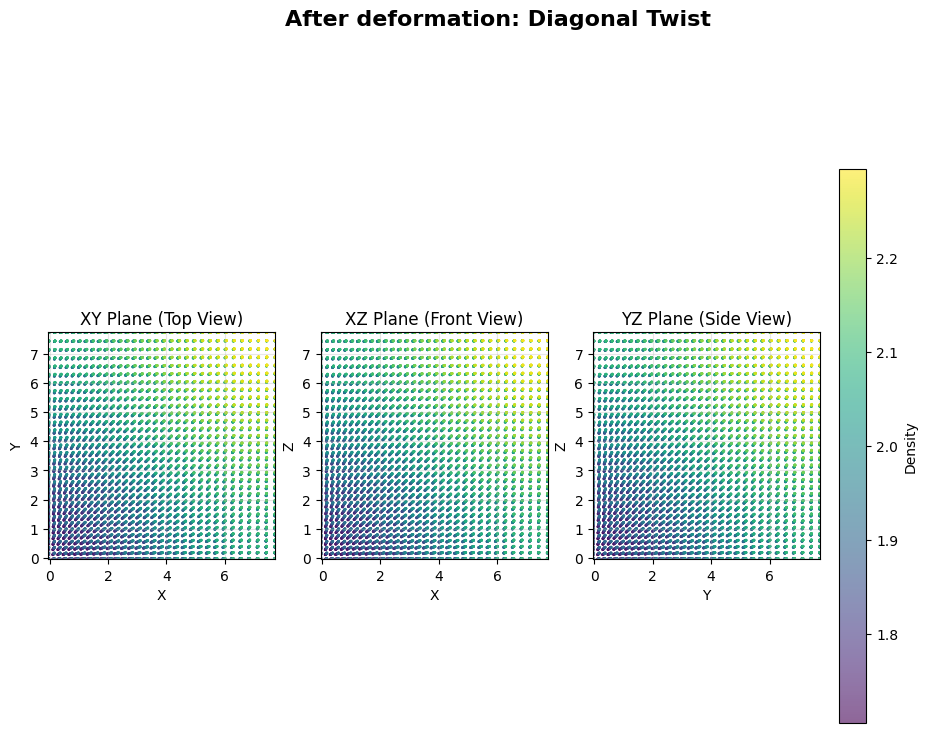

In [38]:
# Create diagonal density pattern that creates twisting deformation
L, M, N = 32, 32, 32
rho_twist = np.ones((L, M, N))

# Density increases diagonally from one corner to opposite corner
for i in range(L):
    for j in range(M):
        for k in range(N):
            # Distance from (0,0,0) corner
            diagonal_distance = (i + j + k) / (L + M + N - 3)
            
            # Density increases along diagonal
            rho_twist[i, j, k] = 0.5 + 3.0 * diagonal_distance

# Setup
grid_twist = vd.VDERMGrid(shape=(L, M, N), h=0.25, min_bounds=[0, 0, 0])
grid_twist.set_density(rho_twist)

vd.plot_pcd(grid_twist.positions, densities=rho_twist.ravel(),
              title='Diagonal Density Gradient', view='2d', cmap='viridis')

final_twist = vd.run_VDERM(grid_twist, n_max=1000, max_eps=0.01)
fig = vd.plot_pcd(final_twist.positions, densities=final_twist.rho.ravel(),
              title='After deformation: Diagonal Twist', view='2d', cmap='viridis')

## Deform the cube based on these density fields

In [39]:
points, norms = vd.create_pcd('cube.stl',n_pts=10_000)
# resize and move the point cloud to be roughly in the middle of the density fields we've made
points -= 3*points.min(axis=0)
points = points/2
print(points.min(axis=0),points.max(axis=0))
# grid parameters are the same for all 4 grids
grid_params = {'shape':(32,32,32),'h':0.25,'min_bounds':[0,0,0]}

[2.75494194 2.75494194 2.75494194] [5.50988388 5.50988388 5.50988388]


In [40]:
stretch_surface = vd.interpolate_to_surface(points, grid_params, grid_gradient.get_displacement_field())
stretch_densities = vd.interpolate_densities(points,grid_gradient)

sphere_surface = vd.interpolate_to_surface(points, grid_params, grid_sphere.get_displacement_field())
sphere_densities = vd.interpolate_densities(points,grid_sphere)

bands_surface = vd.interpolate_to_surface(points, grid_params, grid_bands.get_displacement_field())
bands_densities = vd.interpolate_densities(points,grid_bands)

twist_surface = vd.interpolate_to_surface(points, grid_params, grid_twist.get_displacement_field())
twist_densities = vd.interpolate_densities(points,grid_twist)

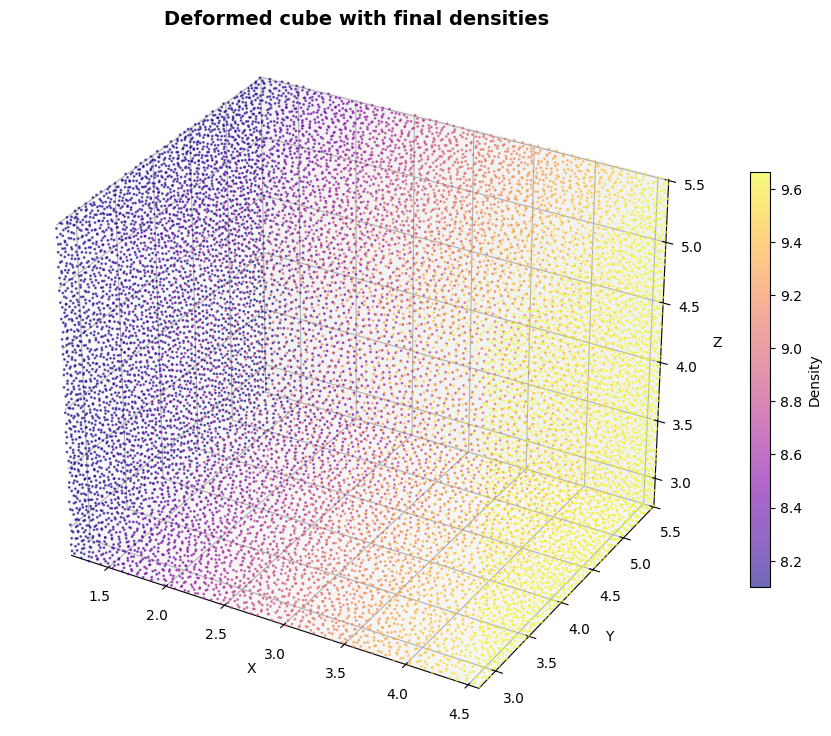

In [41]:
# in the gradient grid, the cube is stretched into a rectangle
fig = vd.plot_pcd(stretch_surface,stretch_densities,view='3d',title='Deformed cube with final densities')

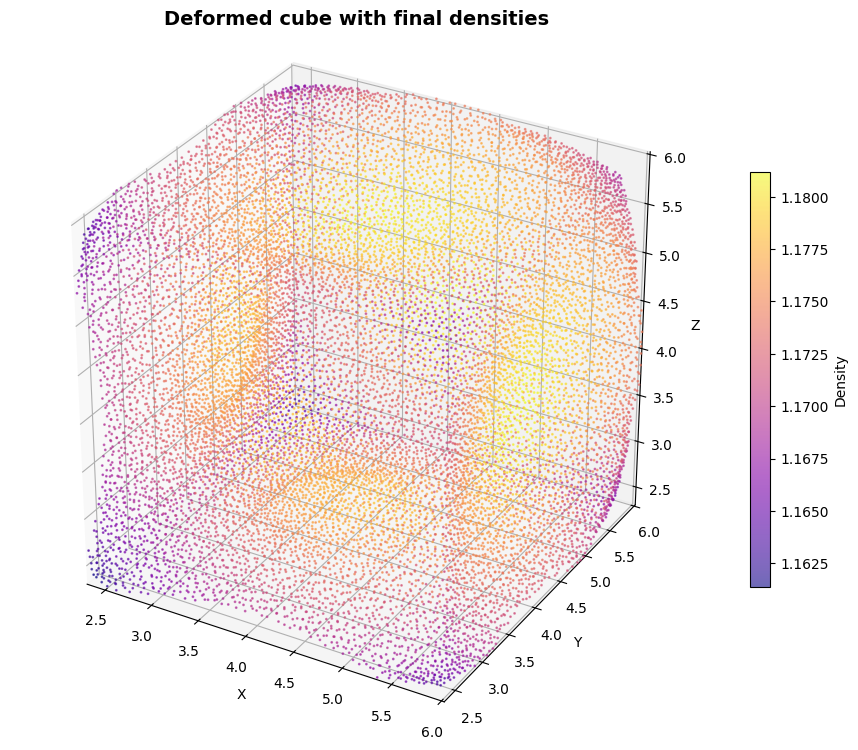

In [42]:
# Because the cube is mostly inside the shell, which pushes inwards as well as outwards
# the faces of the cube are pressed inwards
fig = vd.plot_pcd(sphere_surface,sphere_densities,view='3d',title='Deformed cube with final densities')

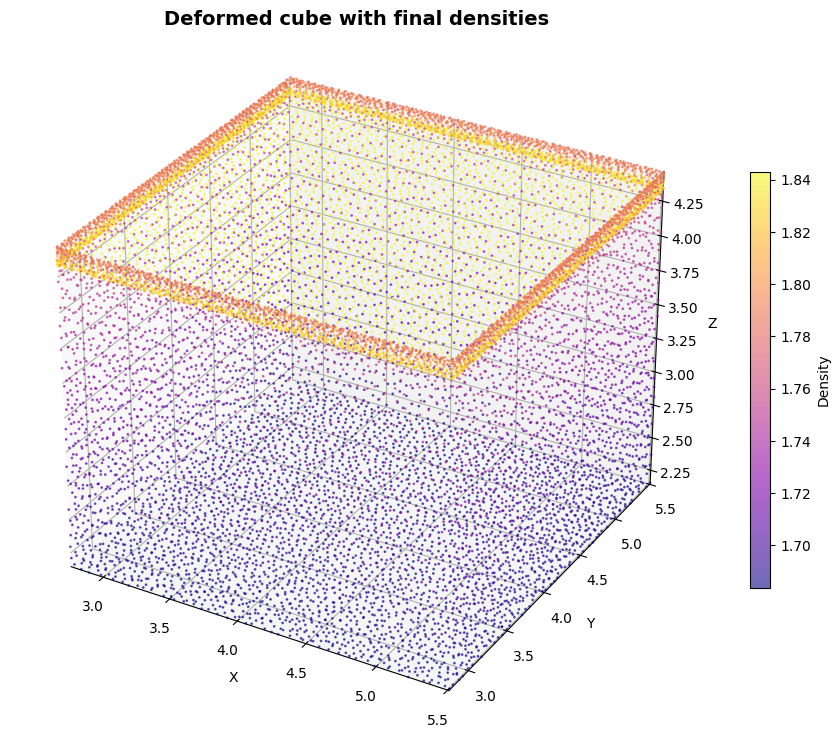

In [43]:
# The cube has been shortened by the suction caused by the low density bottom region.
# Points are concentrated at the top edge, which will impact remeshing. For more information
# on remeshing with VDERM, see the implementation paper originally published by Gary PT Choi and Chris Rycroft (https://arxiv.org/pdf/2003.09725)
fig = vd.plot_pcd(bands_surface,bands_densities,view='3d',title='Deformed cube with final densities')

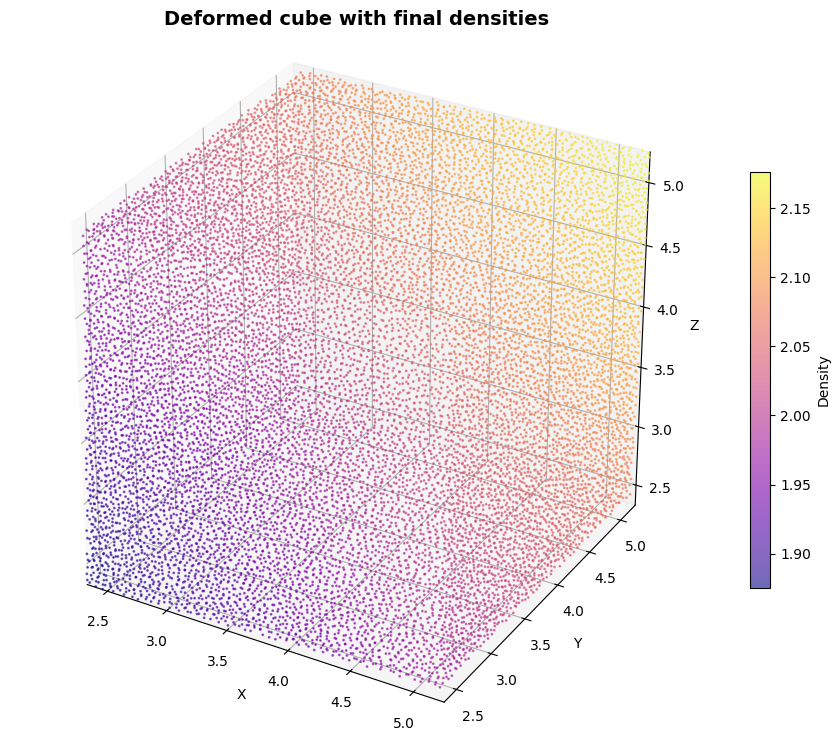

In [44]:
# the cube has been twisted slightly, but because the functional region had fixed boundaries,
# the twist is not pronounced
fig = vd.plot_pcd(twist_surface,twist_densities,view='3d',title='Deformed cube with final densities')